<a href="https://colab.research.google.com/github/TiagoBruno00/Economia_en_Sympy/blob/main/Newton_Raphson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

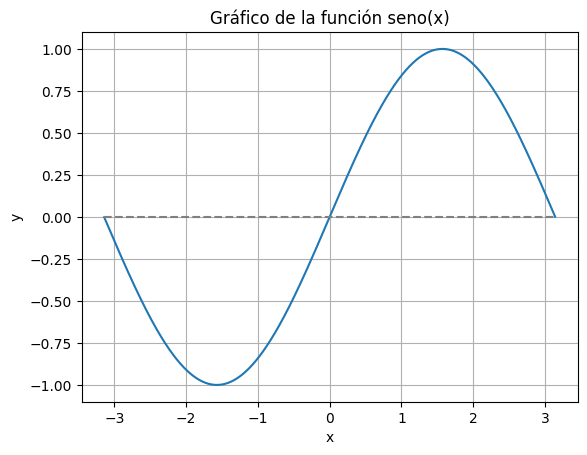

In [ ]:
# Repaso de funciones y bucles

import numpy as np
import matplotlib.pyplot as plt
import math

# Función general
def funcion(dominio, f):
    valores_de_salida = []
    for x in dominio:
        y = f(x)
        valores_de_salida.append(y)
    return dominio, valores_de_salida

dominio_de_seno_de_x = np.linspace(-3.14, 3.14, 10000)
seno_de_x = funcion(dominio_de_seno_de_x, math.sin)

# Graficar la función
plt.plot(seno_de_x[0], seno_de_x[1])
plt.hlines(0, -3.14, 3.14, linestyles='--', colors='grey')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico de la función seno(x)')
plt.grid(True)
plt.show()


# Método de Newton–Raphson para minimizar una SSR de un parámetro

El método de Newton–Raphson es un procedimiento iterativo utilizado para encontrar raíces de ecuaciones no lineales.
En el contexto de la estimación de parámetros mediante mínimos cuadrados, se puede aplicar para encontrar el valor del parámetro que minimiza la Suma de Cuadrados de los Residuos (SSR, por sus siglas en inglés).

Sea la función:
\begin{equation}
SSR(\beta) = \sum_{i=1}^{n} \left( y_i - f(x_i, \beta) \right)^2,
\end{equation}
donde $\beta \in \mathbb{R}$ es el parámetro a estimar.
Minimizar $SSR(\beta)$ es equivalente a resolver la condición de primer orden:
\begin{equation}
\frac{d}{d\beta} SSR(\beta) = 0.
\end{equation}

El método de Newton–Raphson parte de un valor inicial $\beta^{(0)}$ y actualiza dicha aproximación mediante:
\begin{equation}
\beta^{(k+1)} = \beta^{(k)} - \frac{SSR'(\beta^{(k)})}{SSR''(\beta^{(k)})},
\end{equation}

donde $SSR'(\beta)$ y $SSR''(\beta)$ son la primera y segunda derivada de la función respecto a $\beta$.

El proceso se repite hasta que la diferencia entre dos iteraciones consecutivas sea suficientemente pequeña, es decir:
\begin{equation}
\left| \beta^{(k+1)} - \beta^{(k)} \right| < \varepsilon,
\end{equation}

con $\varepsilon > 0$ prefijado como criterio de convergencia.

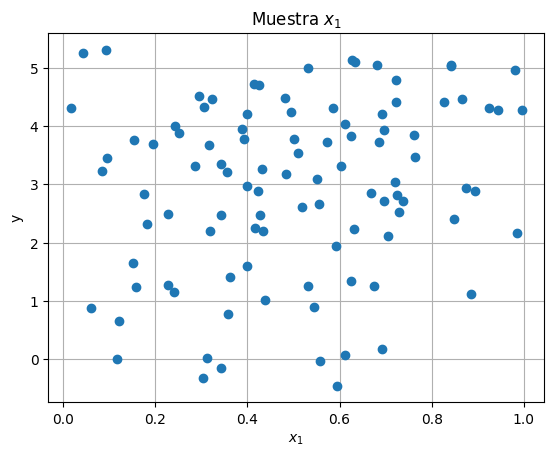

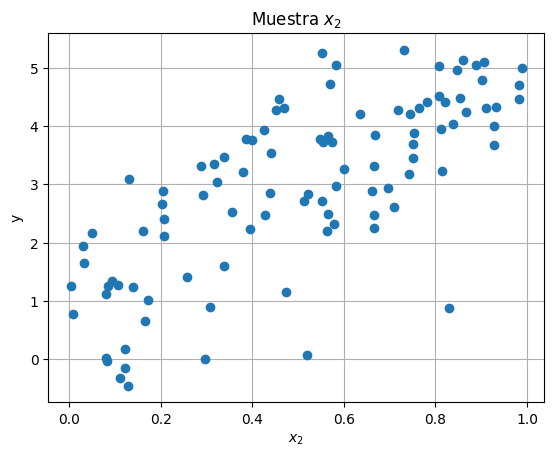

In [ ]:
# Simulación
np.random.seed(123)
muestra_x1 = np.random.rand(100)
muestra_x2 = np.random.rand(100)
mu = np.random.normal(loc=0, scale=1, size = len(muestra_x1))
b = 2 # parámetro a estimar
muestra_y = b*muestra_x1  + b**2*muestra_x2 + mu

# Graficar
plt.plot(muestra_x1, muestra_y, marker='o', linestyle='')
plt.xlabel(r'$x_1$')
plt.ylabel(r'y')
plt.title(r'Muestra $x_1$')
plt.grid(True)
plt.show()

plt.plot(muestra_x2, muestra_y, marker='o', linestyle='')
plt.xlabel(r'$x_2$')
plt.ylabel(r'y')
plt.title(r'Muestra $x_2$')
plt.grid(True)
plt.show()

In [ ]:
# SSR
valores_posibles_b = np.linspace(-5, 5, 10000)
def SSR_muestra(b):
  return np.sum((muestra_y - b*muestra_x1 - b**2*muestra_x2)**2)
SSR_valores = funcion(valores_posibles_b, SSR_muestra)

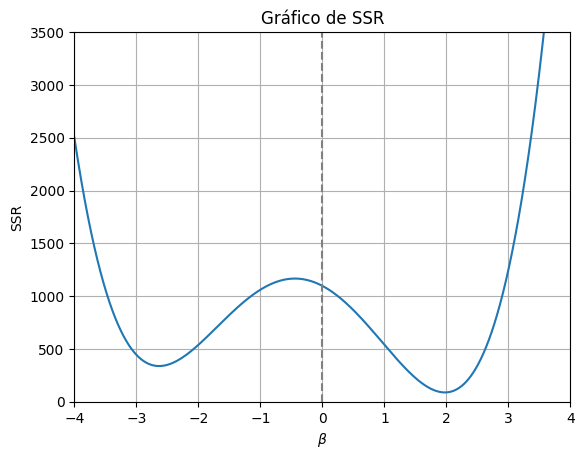

In [ ]:
# Graficar
plt.plot(SSR_valores[0], SSR_valores[1])
plt.ylim(0, 3500)
plt.xlim(-4, 4)
plt.vlines(x=0, ymin=0, ymax=3500, linestyles='--', colors='grey')
plt.xlabel(r'$\beta$')
plt.ylabel('SSR')
plt.title('Gráfico de SSR')
plt.grid(True)
plt.show()

In [ ]:
# Calcular las derivadas para usar NR
import sympy as sp

# Variables simbólicas
beta = sp.Symbol('beta')
n = sp.Symbol('n', integer=True, positive=True)
i = sp.Symbol('i', integer=True)
SSR_simbolica = sp.Function('SSR')(beta)

# Variables indexadas
X1 = sp.IndexedBase('x_1')
X2 = sp.IndexedBase('x_2')
Y = sp.IndexedBase('y')

# SSR
SSR_def = sp.Eq(SSR_simbolica, sp.Sum((Y[i] - beta * X1[i] - beta**2 * X2[i])**2, (i, 1, n)));SSR_def

Eq(SSR(beta), Sum((-beta**2*x_2[i] - beta*x_1[i] + y[i])**2, (i, 1, n)))

In [ ]:
Primera_derivada = sp.Eq(sp.Derivative(SSR_simbolica), sp.expand((SSR_def.rhs).diff(beta)));Primera_derivada

Eq(Derivative(SSR(beta), beta), Sum(2*beta*x_1[i]**2, (i, 1, n)) + Sum(4*beta**3*x_2[i]**2, (i, 1, n)) + Sum(-2*x_1[i]*y[i], (i, 1, n)) + Sum(-4*beta*x_2[i]*y[i], (i, 1, n)) + Sum(6*beta**2*x_1[i]*x_2[i], (i, 1, n)))

In [ ]:
Segunda_derivada = sp.Eq(sp.Derivative(SSR_simbolica, beta, beta), sp.expand((Primera_derivada.rhs).diff(beta)));Segunda_derivada

Eq(Derivative(SSR(beta), (beta, 2)), Sum(12*beta**2*x_2[i]**2, (i, 1, n)) + Sum(-4*x_2[i]*y[i], (i, 1, n)) + Sum(12*beta*x_1[i]*x_2[i], (i, 1, n)) + Sum(2*x_1[i]**2, (i, 1, n)))

In [ ]:
# Sumas de cuadrados de la muestra
suma_x2_cuad = np.sum(muestra_x2**2)
suma_x1x2 = np.sum(muestra_x1 * muestra_x2)
suma_x1_cuad = np.sum(muestra_x1**2)
suma_x2y = np.sum(muestra_x2 * muestra_y)
suma_x1y = np.sum(muestra_x1 * muestra_y)

# Coeficientes del polinomio

# Primera derivada
a3 = 4 * suma_x2_cuad
a2 = 6 * suma_x1x2
a1 = 2 * suma_x1_cuad - 4 * suma_x2y
a0 = -2 * suma_x1y

# Segunda derivada
a2_2 = a3 * 3
a1_2 = a2 * 2
a0_2 = a1

In [ ]:
# Definir algoritmo NR específico del modelo y la muestra
def NR(valor_inicial, valores_x1, valores_x2, valores_y):
  numerador = valor_inicial**3 * a3 + valor_inicial**2 * a2  + valor_inicial * a1 + a0
  denominador =  valor_inicial**2 * a2_2 + valor_inicial * a1_2  +  a0_2
  beta_siguiente = valor_inicial - numerador / denominador
  return beta_siguiente

In [ ]:
# Lambdify: convierte la expresión simbólica a función NumPy
primera_fun = sp.lambdify((beta, X1, X2, Y, n), Primera_derivada.rhs, 'numpy')
segunda_fun = sp.lambdify((beta, X1, X2, Y, n), Segunda_derivada.rhs, 'numpy')

In [ ]:
primera_valores = funcion(valores_posibles_b, lambda beta: primera_fun(beta, muestra_x1, muestra_x2, muestra_y, len(muestra_y)-1))
segunda_valores = funcion(valores_posibles_b, lambda beta: segunda_fun(beta, muestra_x1, muestra_x2, muestra_y, len(muestra_y)-1))

In [ ]:
primera_valores1 = funcion(valores_posibles_b, lambda valor_inicial: valor_inicial**3 * a3 + valor_inicial**2 * a2  + valor_inicial * a1 + a0)
segunda_valores1 = funcion(valores_posibles_b, lambda valor_inicial: valor_inicial**2 * a2_2 + valor_inicial * a1_2  +  a0_2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

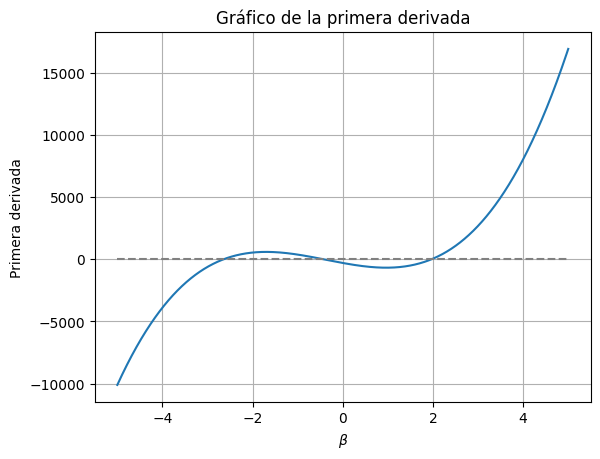

In [ ]:
plt.plot(primera_valores1[0], primera_valores1[1])
plt.hlines(0, -5, 5, linestyles='--', colors='grey')
plt.xlabel(r'$\beta$')
plt.ylabel('Primera derivada')
plt.title('Gráfico de la primera derivada')
plt.grid(True)
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

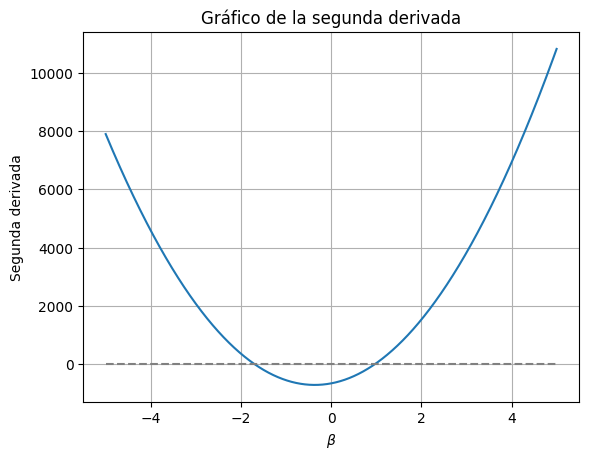

In [ ]:
plt.plot(segunda_valores[0], segunda_valores[1])
plt.hlines(0, -5, 5, linestyles='--', colors='grey')
plt.xlabel(r'$\beta$')
plt.ylabel('Segunda derivada')
plt.title('Gráfico de la segunda derivada')
plt.grid(True)
plt

In [ ]:
# Versión lambdify
def NR2(valor_inicial, valores_x1, valores_x2, valores_y):
  numerador = primera_fun(valor_inicial, valores_x1, valores_x2, valores_y, len(valores_y)-1)
  denominador = segunda_fun(valor_inicial, valores_x1, valores_x2, valores_y, len(valores_y)-1)
  beta_siguiente = valor_inicial - numerador / denominador
  return beta_siguiente

In [ ]:
# Iterar
epsilon = 1e-10
max_iteraciones = 80
vi = -1
betas_guardados = [vi]
iteracion = 0

while iteracion < max_iteraciones:
    beta_siguiente = NR(vi, muestra_x1, muestra_x2, muestra_y)  # calcula el nuevo beta
    betas_guardados.append(beta_siguiente)                       # guarda el beta nuevo en la lista

    if abs(beta_siguiente - vi) < epsilon:                       # verifica si la diferencia es pequeña
        print(f'Convergió en la iteración {iteracion + 1}')
        break                                                    # si convergió, corta el ciclo

    vi = beta_siguiente                                          # actualiza el valor de vi para la siguiente iteración
    iteracion += 1                                               # suma 1 al contador de iteraciones
else:
    print('No convergió en el máximo de iteraciones')

print('Estimación final:', betas_guardados[-1])

Convergió en la iteración 5
Estimación final: -0.4430088178876464


In [ ]:
# Segunada derivada positiva para un mínimo ¿local o global?
Segunda_derivada_valuda = betas_guardados[-1]**2 * a2_2 + betas_guardados[-1] * a1_2  +  a0_2
print(Segunda_derivada_valuda)

-712.5997759397466


In [ ]:
segunda_derivada_valuda = segunda_fun(betas_guardados[-1], muestra_x1, muestra_x2, muestra_y, len(muestra_y)-1)
print(segunda_derivada_valuda)

-706.7388478093274


In [ ]:
# Prueba de altura
beta_negativo = betas_guardados[-1]
print(SSR_muestra(beta_negativo))

337.86540919210836


In [ ]:
beta_positivo = betas_guardados[-1]
print(SSR_muestra(beta_positivo))

87.93236381519426
